# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [5]:
import pandas as pd

In [6]:

df_airbnb = pd.read_csv(r"C:\Users\Usuario\Pictures\phyton\PRÁCTICA 5 ENTREGAR\data\src/airbnb.csv")

In [7]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [8]:
df_airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [12]:
# Consejo: para mostrar 3 alternativas emplee head(3)

# Filtrar las habitaciones adecuadas para Alicia
filtered_df = df_airbnb[(df_airbnb['accommodates'] >= 4) & (df_airbnb['bedrooms'] >= 2) & (df_airbnb['reviews'] > 10) & (df_airbnb['overall_satisfaction'] > 4)]

# Ordenar las habitaciones por puntuación y luego por número de críticas
sorted_df = filtered_df.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

# Obtener las tres mejores alternativas
top_3_alternatives = sorted_df.head(3)

# Mostrar las alternativas a Alicia
print(top_3_alternatives[['room_id', 'room_type', 'neighborhood', 'overall_satisfaction', 'reviews', 'price']])


     room_id        room_type       neighborhood  overall_satisfaction  \
120   176153  Entire home/apt       Misericórdia                   5.0   
16     44043  Entire home/apt  Santa Maria Maior                   5.0   
140   202150  Entire home/apt  Santa Maria Maior                   5.0   

     reviews  price  
120      438  102.0  
16       316   80.0  
140      274   62.0  


### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [15]:
# Filtrar las propiedades de Roberto (ID 97503) y Clara (ID 90387)
# Filtrar las propiedades de Roberto (ID 97503) y Clara (ID 90387)
roberto_clara_df = df_airbnb[df_airbnb['room_id'].isin([97503, 90387])]

# Guardar el DataFrame en un archivo Excel llamado "roberto.xlsx" usando openpyxl
roberto_clara_df.to_excel('roberto.xlsx', index=False, engine='openpyxl')

print("DataFrame de Roberto y Clara guardado en 'roberto.xlsx'")

DataFrame de Roberto y Clara guardado en 'roberto.xlsx'



### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [17]:
# Filtrar las propiedades adecuadas para Diana
filtered_df = df_airbnb[(df_airbnb['price'] <= 50) & (df_airbnb['room_type'] == 'Shared room')]

# Ordenar las propiedades por puntuación y precio
sorted_df = filtered_df.sort_values(by=['overall_satisfaction', 'price'], ascending=[False, True])

# Obtener las 10 propiedades más baratas con mejor puntuación
top_10_properties = sorted_df.head(10)

# Mostrar las 10 propiedades a Diana
print(top_10_properties[['room_id', 'room_type', 'neighborhood', 'overall_satisfaction', 'price']])

        room_id    room_type    neighborhood  overall_satisfaction  price
9065   14933182  Shared room   Santo António                   5.0   11.0
6056   10397682  Shared room    Misericórdia                   5.0   13.0
7060   12299998  Shared room         Arroios                   5.0   13.0
7066   12305540  Shared room         Arroios                   5.0   13.0
8918   14719962  Shared room  Avenidas Novas                   5.0   13.0
7034   12268067  Shared room         Arroios                   5.0   16.0
9964   16150682  Shared room  Avenidas Novas                   5.0   16.0
10723  17096560  Shared room         Areeiro                   5.0   16.0
6459   11427995  Shared room    Misericórdia                   5.0   18.0
11058  17497074  Shared room         Arroios                   5.0   18.0


## Usando MatPlot

In [19]:
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

### Caso 1.

Realizar un gráfico circular, de la cantidad de tipo de habitaciones `room_type`  

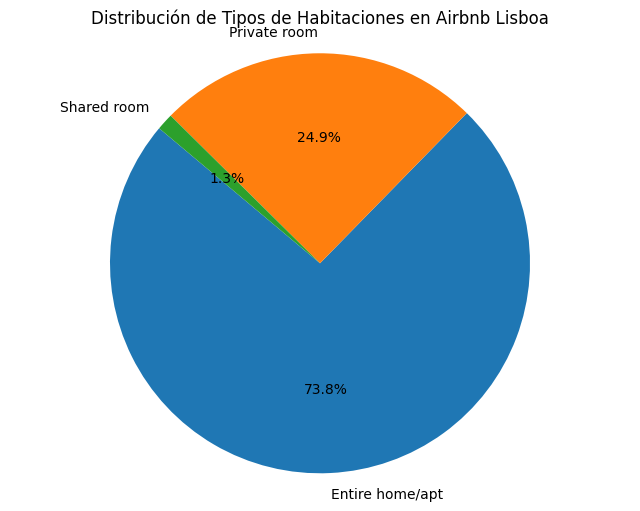

In [24]:
# Crear un gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Tipos de Habitaciones en Airbnb Lisboa')
plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse

# Mostrar el gráfico
plt.show()
